### Here are few Articles which will be helpful to learn more about Model Metrics:

- https://aichamp.wordpress.com/2017/10/18/how-r2-error-is-calculated-in-generalized-linear-model/
- http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
- https://datamize.wordpress.com/2015/01/24/how-to-plot-a-roc-curve-in-scikit-learn/
- https://www.analyticsvidhya.com/blog/2016/02/7-important-model-evaluation-error-metrics/
- https://www.kaggle.com/wiki/Metrics/history/588



## Importing important libraries

In [1]:
import h2o
import sys
import pandas as pd
from h2o.estimators.gbm import H2OGradientBoostingEstimator

## Initializing H2O 

In [2]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 1 hour 33 mins
H2O cluster version:,3.14.0.3
H2O cluster version age:,27 days
H2O cluster name:,H2O_from_python_avkashchauhan_jqfer7
H2O cluster total nodes:,1
H2O cluster free memory:,3.234 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


## Importing dataset from a public URL

In [3]:
local_url = "https://raw.githubusercontent.com/h2oai/sparkling-water/master/examples/smalldata/prostate/prostate.csv"
df = h2o.import_file(local_url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
df

ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
1,0,65,1,2,1,1.4,0,6
2,0,72,1,3,2,6.7,0,7
3,0,70,1,1,2,4.9,0,6
4,0,76,2,2,1,51.2,20,7
5,0,69,1,1,1,12.3,55.9,6
6,1,71,1,3,2,3.3,0,8
7,0,68,2,4,2,31.9,0,7
8,0,61,2,4,2,66.7,27.2,7
9,0,69,1,1,1,3.9,24,7
10,0,68,2,1,2,13,0,6


In [5]:
df.describe()

Rows:380
Cols:9




,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
type,int,int,int,int,int,int,real,real,int
mins,1.0,0.0,43.0,0.0,1.0,1.0,0.3,0.0,0.0
mean,190.5,0.402631578947,66.0394736842,1.08684210526,2.27105263158,1.10789473684,15.4086315789,15.8129210526,6.38421052632
maxs,380.0,1.0,79.0,2.0,4.0,2.0,139.7,97.6,9.0
sigma,109.840793879,0.491074338963,6.52707126917,0.308773258025,1.00010761815,0.310656449351,19.9975726686,18.3476199673,1.09195337443
zeros,0,227,0,3,0,0,0,167,2
missing,0,0,0,0,0,0,0,0,0
0,1.0,0.0,65.0,1.0,2.0,1.0,1.4,0.0,6.0
1,2.0,0.0,72.0,1.0,3.0,2.0,6.7,0.0,7.0
2,3.0,0.0,70.0,1.0,1.0,2.0,4.9,0.0,6.0


## Setting up the feature set and response column for machine learning

In [6]:
y = "CAPSULE"
feature_names = df.col_names
feature_names.remove(y) 
df[y] = df[y].asfactor()

## Splitting loaded dataset into training and validation dataset

In [7]:
df_train, df_valid, df_test = df.split_frame(ratios=[0.8,0.1])
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(310, 9)
(39, 9)
(31, 9)


## Setting up H2O GBM Esitmatior with all the GBM configuration

In [8]:
prostate_gbm = H2OGradientBoostingEstimator(model_id = "prostate_gbm",
            ntrees=500,
            learn_rate=0.001,
            max_depth=10,
            score_each_iteration=True)

## Now starting the machine learning process to build a GBM model

In [9]:
prostate_gbm.train(x = feature_names, y = y, training_frame=df_train, validation_frame=df_valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


## Taking a look at our GBM model details and its metrics

In [10]:
prostate_gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  prostate_gbm


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.166013814678
RMSE: 0.407447928793
LogLoss: 0.514844884004
Mean Per-Class Error: 0.152554935473
AUC: 0.927254098361
Gini: 0.854508196721
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.427426882115: 


,0,1,Error,Rate
0,163.0,25.0,0.133,(25.0/188.0)
1,21.0,101.0,0.1721,(21.0/122.0)
Total,184.0,126.0,0.1484,(46.0/310.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4274269,0.8145161,99.0
max f2,0.3652881,0.8850227,139.0
max f0point5,0.4544117,0.8333333,82.0
max accuracy,0.4298423,0.8516129,96.0
max precision,0.6245743,1.0,0.0
max recall,0.2806571,1.0,178.0
max specificity,0.6245743,1.0,0.0
max absolute_mcc,0.4274269,0.6911635,99.0
max min_per_class_accuracy,0.4194086,0.8351064,106.0
max mean_per_class_accuracy,0.4274269,0.8474451,99.0


Gains/Lift Table: Avg response rate: 39.35 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0129032,0.6180490,2.5409836,2.5409836,1.0,1.0,0.0327869,0.0327869,154.0983607,154.0983607
,2,0.0322581,0.6144981,2.5409836,2.5409836,1.0,1.0,0.0491803,0.0819672,154.0983607,154.0983607
,3,0.0322581,0.6144858,0.0,2.5409836,0.0,1.0,0.0,0.0819672,-100.0,154.0983607
,4,0.0419355,0.6077297,2.5409836,2.5409836,1.0,1.0,0.0245902,0.1065574,154.0983607,154.0983607
,5,0.0516129,0.6034665,2.5409836,2.5409836,1.0,1.0,0.0245902,0.1311475,154.0983607,154.0983607
,6,0.1,0.5655630,2.5409836,2.5409836,1.0,1.0,0.1229508,0.2540984,154.0983607,154.0983607
,7,0.1580645,0.5375112,2.2586521,2.4372700,0.8888889,0.9591837,0.1311475,0.3852459,125.8652095,143.7269990
,8,0.2,0.5201386,2.1500631,2.3770492,0.8461538,0.9354839,0.0901639,0.4754098,115.0063052,137.7049180
,9,0.3,0.4787807,1.8852459,2.2131148,0.7419355,0.8709677,0.1885246,0.6639344,88.5245902,121.3114754
,10,0.4,0.4279131,1.5573770,2.0491803,0.6129032,0.8064516,0.1557377,0.8196721,55.7377049,104.9180328




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.208534611631
RMSE: 0.456655900685
LogLoss: 0.60609018809
Mean Per-Class Error: 0.230263157895
AUC: 0.802631578947
Gini: 0.605263157895
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.420397912283: 


,0,1,Error,Rate
0,15.0,5.0,0.25,(5.0/20.0)
1,4.0,15.0,0.2105,(4.0/19.0)
Total,19.0,20.0,0.2308,(9.0/39.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4203979,0.7692308,18.0
max f2,0.2613442,0.8571429,27.0
max f0point5,0.4696711,0.7594937,13.0
max accuracy,0.4203979,0.7692308,18.0
max precision,0.6144981,1.0,0.0
max recall,0.2412997,1.0,34.0
max specificity,0.6144981,1.0,0.0
max absolute_mcc,0.4203979,0.5394737,18.0
max min_per_class_accuracy,0.4203979,0.75,18.0
max mean_per_class_accuracy,0.4203979,0.7697368,18.0


Gains/Lift Table: Avg response rate: 48.72 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0256410,0.5980799,2.0526316,2.0526316,1.0,1.0,0.0526316,0.0526316,105.2631579,105.2631579
,2,0.0256410,0.5816617,0.0,2.0526316,0.0,1.0,0.0,0.0526316,-100.0,105.2631579
,3,0.0512821,0.5695202,2.0526316,2.0526316,1.0,1.0,0.0526316,0.1052632,105.2631579,105.2631579
,4,0.0512821,0.5647104,0.0,2.0526316,0.0,1.0,0.0,0.1052632,-100.0,105.2631579
,5,0.0512821,0.5599006,0.0,2.0526316,0.0,1.0,0.0,0.1052632,-100.0,105.2631579
,6,0.1025641,0.5371191,2.0526316,2.0526316,1.0,1.0,0.1052632,0.2105263,105.2631579,105.2631579
,7,0.1538462,0.5337983,2.0526316,2.0526316,1.0,1.0,0.1052632,0.3157895,105.2631579,105.2631579
,8,0.2051282,0.5143422,1.0263158,1.7960526,0.5,0.875,0.0526316,0.3684211,2.6315789,79.6052632
,9,0.3076923,0.5063071,1.0263158,1.5394737,0.5,0.75,0.1052632,0.4736842,2.6315789,53.9473684
,10,0.4102564,0.4597520,1.5394737,1.5394737,0.75,0.75,0.1578947,0.6315789,53.9473684,53.9473684



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2017-10-19 22:00:53,0.001 sec,0.0,0.4885366,0.6703089,0.5,1.0,0.6064516,0.5085297,0.7107969,0.5,1.0,0.5128205
,2017-10-19 22:00:53,0.008 sec,1.0,0.4883373,0.6699010,0.8711632,2.4072476,0.2451613,0.5083423,0.7103979,0.8381579,2.0526316,0.2307692
,2017-10-19 22:00:53,0.014 sec,2.0,0.4881383,0.6694939,0.8729290,2.4072476,0.2387097,0.5081569,0.7100031,0.8315789,2.0526316,0.2307692
,2017-10-19 22:00:53,0.021 sec,3.0,0.4879396,0.6690877,0.8726238,2.4072476,0.2419355,0.5079682,0.7096015,0.8421053,2.0526316,0.2051282
,2017-10-19 22:00:53,0.027 sec,4.0,0.4877412,0.6686823,0.8724058,2.4072476,0.2419355,0.5077834,0.7092085,0.8421053,2.0526316,0.2051282
---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2017-10-19 22:01:05,11.747 sec,496.0,0.4079555,0.5157755,0.9268617,2.5409836,0.1483871,0.4570174,0.6067789,0.8026316,2.0526316,0.2307692
,2017-10-19 22:01:05,11.790 sec,497.0,0.4078285,0.5155416,0.9269925,2.5409836,0.1483871,0.4569379,0.6066274,0.8026316,2.0526316,0.2307692
,2017-10-19 22:01:05,11.832 sec,498.0,0.4077046,0.5153123,0.9269489,2.5409836,0.1483871,0.4568549,0.6064678,0.8026316,2.0526316,0.2307692
,2017-10-19 22:01:05,11.874 sec,499.0,0.4075745,0.5150771,0.9271233,2.5409836,0.1483871,0.4567369,0.6062458,0.8026316,2.0526316,0.2307692



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
GLEASON,4799.4150391,1.0,0.4262102
ID,1946.7968750,0.4056321,0.1728845
VOL,1453.7677002,0.3029052,0.1291013
DPROS,1240.6960449,0.2585098,0.1101795
PSA,799.9694824,0.1666806,0.0710410
AGE,633.3639526,0.1319669,0.0562456
DCAPS,386.6675720,0.0805656,0.0343379
RACE,0.0,0.0,0.0


## Getting Model Performance on all kind of input data (training, validation and test)

In [11]:
train_performance = prostate_gbm.model_performance(df_train)
valid_performance = prostate_gbm.model_performance(df_valid)
test_performance = prostate_gbm.model_performance(df_test)

## AUC Metrics

In [12]:
print(train_performance.auc())
print(valid_performance.auc())
print(test_performance.auc())
print(prostate_gbm.auc())

0.927254098361
0.802631578947
0.736842105263
0.927254098361


## Above you will see the base model performance is provided on training dataset

## GINI Metrics

In [13]:
print(train_performance.gini())
print(valid_performance.gini())
print(test_performance.gini())
print(prostate_gbm.gini())

0.854508196721
0.605263157895
0.473684210526
0.854508196721


## Getting Prediction metrics

In [14]:
predictions = prostate_gbm.predict(df_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [15]:
predictions

predict,p0,p1
0,0.602655,0.397345
0,0.748878,0.251122
1,0.442681,0.557319
0,0.707184,0.292816
1,0.483485,0.516515
1,0.53716,0.46284
0,0.739027,0.260973
0,0.736587,0.263413
1,0.384839,0.615161
1,0.407892,0.592108


In [16]:
pred= pd.DataFrame()

In [17]:
# Note If you want to get all the highest probablities from p0 and p1 you can try the following:
pred['predict'] =  predictions.as_data_frame().apply(lambda x: x['p0'] if x['p0'] >= x['p1'] else x['p1'], axis = 1)
## After that you can convert pred Data Frame (which is pandas) to H2O frame as below
predict_probability = h2o.H2OFrame(pred)

## We are going to select the p1 values from the prediction frame to calculate the AUC

In [21]:
predict_probability = predictions['p1']

In [22]:
predict_probability

p1
0.397345
0.251122
0.557319
0.292816
0.516515
0.46284
0.260973
0.263413
0.615161
0.592108


## This is how AUC is calculated for Logistic classification Models

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

In [24]:
print(df_test[y].shape)
print(predict_probability['predict'].shape)

(31, 1)
(31, 1)


In [25]:
actual = df_test[y].as_data_frame()
actual_list = actual['CAPSULE'].tolist()
print(actual_list)

[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]


In [26]:
predictions_temp = predict_probability_x['p1'].as_data_frame()
predictions_list = predictions_temp['p1'].tolist()
print(predictions_list)

[0.3973448776140419, 0.25112158546528796, 0.5573191073098066, 0.2928156269862124, 0.5165145604313923, 0.4628395213226922, 0.2609728476201035, 0.2634128288761269, 0.6151607971160951, 0.5921080634983844, 0.3066260781269068, 0.5755493238714777, 0.4307756345017631, 0.3390232346287637, 0.5264105948797293, 0.5122811510791463, 0.3629409963150697, 0.3261618150129987, 0.4947485216842446, 0.5000625309570932, 0.4802451765305494, 0.24025854050008885, 0.4964580404918529, 0.5109317295716732, 0.5285679360398154, 0.4769257367324194, 0.5297525072360061, 0.5024569557016627, 0.2481513758175777, 0.5297525072360061, 0.2539644508163105]


## Lets calculate TPR, FPR and Threshold metrics from the predictions and original data frame
 - False Positive Rate (fpr)
 - True Positive Rate (tpr)
 - Threashold 

In [27]:
fpr, tpr, thresholds = roc_curve(actual_list, predictions_list)

In [28]:
print(fpr)
print(tpr)
print(thresholds)

[ 0.          0.          0.05263158  0.05263158  0.15789474  0.21052632
  0.21052632  0.26315789  0.26315789  0.31578947  0.31578947  0.47368421
  0.47368421  0.89473684  0.89473684  1.        ]
[ 0.08333333  0.16666667  0.16666667  0.25        0.25        0.25        0.5
  0.5         0.75        0.75        0.83333333  0.83333333  0.91666667
  0.91666667  1.          1.        ]
[ 0.6151608   0.59210806  0.57554932  0.55731911  0.52975251  0.52856794
  0.51228115  0.51093173  0.49645804  0.49474852  0.48024518  0.43077563
  0.39734488  0.25396445  0.25112159  0.24025854]


## Now we are calculating the AUC value using FPR and TPR

In [30]:
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.736842105263


## Lets plot the AUC Curve using matplotlib

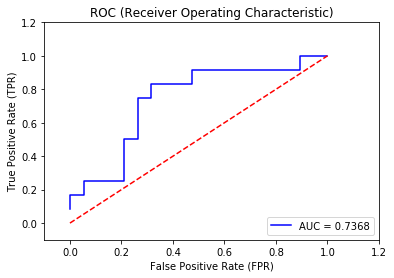

In [33]:
plt.title('ROC (Receiver Operating Characteristic)')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.show()

In [34]:
print(test_performance.auc())

0.736842105263


### Note: Above you can see that the AUC metrics for test performance is same as we calculated

## If you want to know how GINI metric is calculated from AUC, use the formula below:

In [35]:
GINI = (2 * roc_auc) - 1
print(GINI)

0.473684210526


In [36]:
print(test_performance.gini())

0.473684210526


### Note: Above you can see that the GINI metrics for test performance is same as we calculated